# PROBLEM STATEMENT: 

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

# IMPORTING ALL NECESSARY LIBRARIES


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [54]:
iris=datasets.load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
iris_df.shape

(150, 4)

In [56]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [57]:
iris_df.isnull

<bound method DataFrame.isnull of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [58]:
iris_df['flower']=iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
iris_df.drop(['sepal length (cm)','sepal width (cm)','flower'],axis='columns',inplace=True)

In [60]:
iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Performing K-Means:

In [61]:
from sklearn.cluster import KMeans

sse=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 0)
    km.fit(iris_df)
    sse.append(km.inertia_)

Elbow method to check the optimum value of number of clusters:

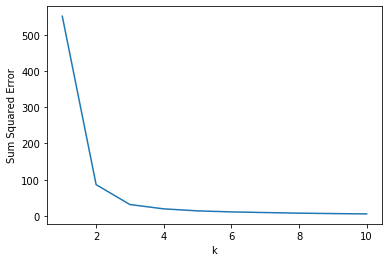

In [62]:
plt.xlabel('k')
plt.ylabel('Sum Squared Error')
plt.plot(range(1,11),sse)

In [63]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(iris_df)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
iris_df['clusters']=y_predicted
iris_df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [65]:
iris_df.clusters.unique()

array([0, 2, 1])

In [66]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
df1=iris_df[iris_df.clusters==0]
df2=iris_df[iris_df.clusters==1]
df3=iris_df[iris_df.clusters==2]


SCATTER PLOT OF CLUSTERS:

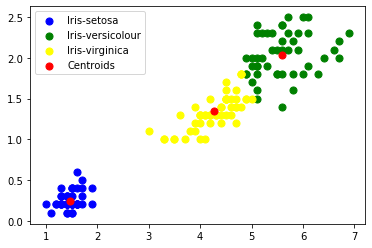

In [68]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',s=50,label = 'Iris-setosa')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',s=50,label = 'Iris-versicolour')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow',s=50,label = 'Iris-virginica')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 50, c = 'red', label = 'Centroids')
plt.legend()